2025-12-04 09:46:05,844 - INFO - Loading data from ../data/raw/network_data.csv


🚀 Starting Exploratory Data Analysis (EDA)...


2025-12-04 09:46:06,142 - INFO - Loaded 100655 records with 42 features


✅ Data loaded. Shape: (100655, 42)

--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100655 entries, 0 to 100654
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     100655 non-null  int64  
 1   protocol_type                100655 non-null  object 
 2   service                      100655 non-null  object 
 3   flag                         100655 non-null  object 
 4   src_bytes                    100655 non-null  int64  
 5   dst_bytes                    100655 non-null  int64  
 6   land                         100655 non-null  int64  
 7   wrong_fragment               100655 non-null  int64  
 8   urgent                       100655 non-null  int64  
 9   hot                          100655 non-null  int64  
 10  num_failed_logins            100655 non-null  int64  
 11  logged_in                    100655 non-null  int64  
 12 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


/tmp/ipykernel_163328/2706004750.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')



--- Class Distribution (Label) ---
label
normal.             97278
smurf.               2407
neptune.              902
satan.                 13
portsweep.             13
ipsweep.               11
warezclient.            8
back.                   8
nmap.                   7
teardrop.               7
buffer_overflow.        1
Name: count, dtype: int64


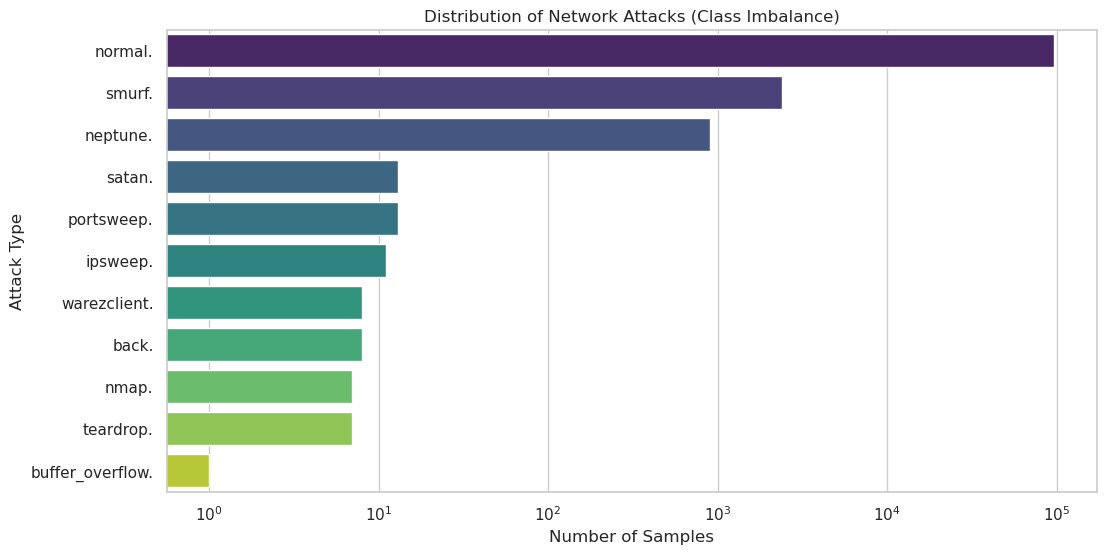


--- Protocol Usage ---


/tmp/ipykernel_163328/2706004750.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='protocol_type', palette='magma')


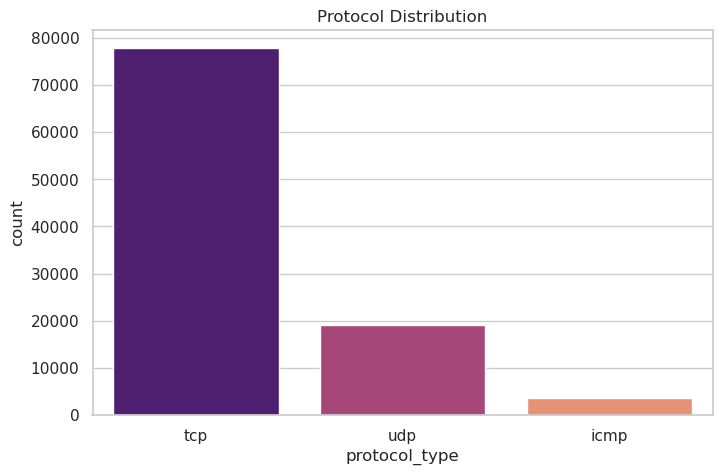


--- Feature Correlations ---


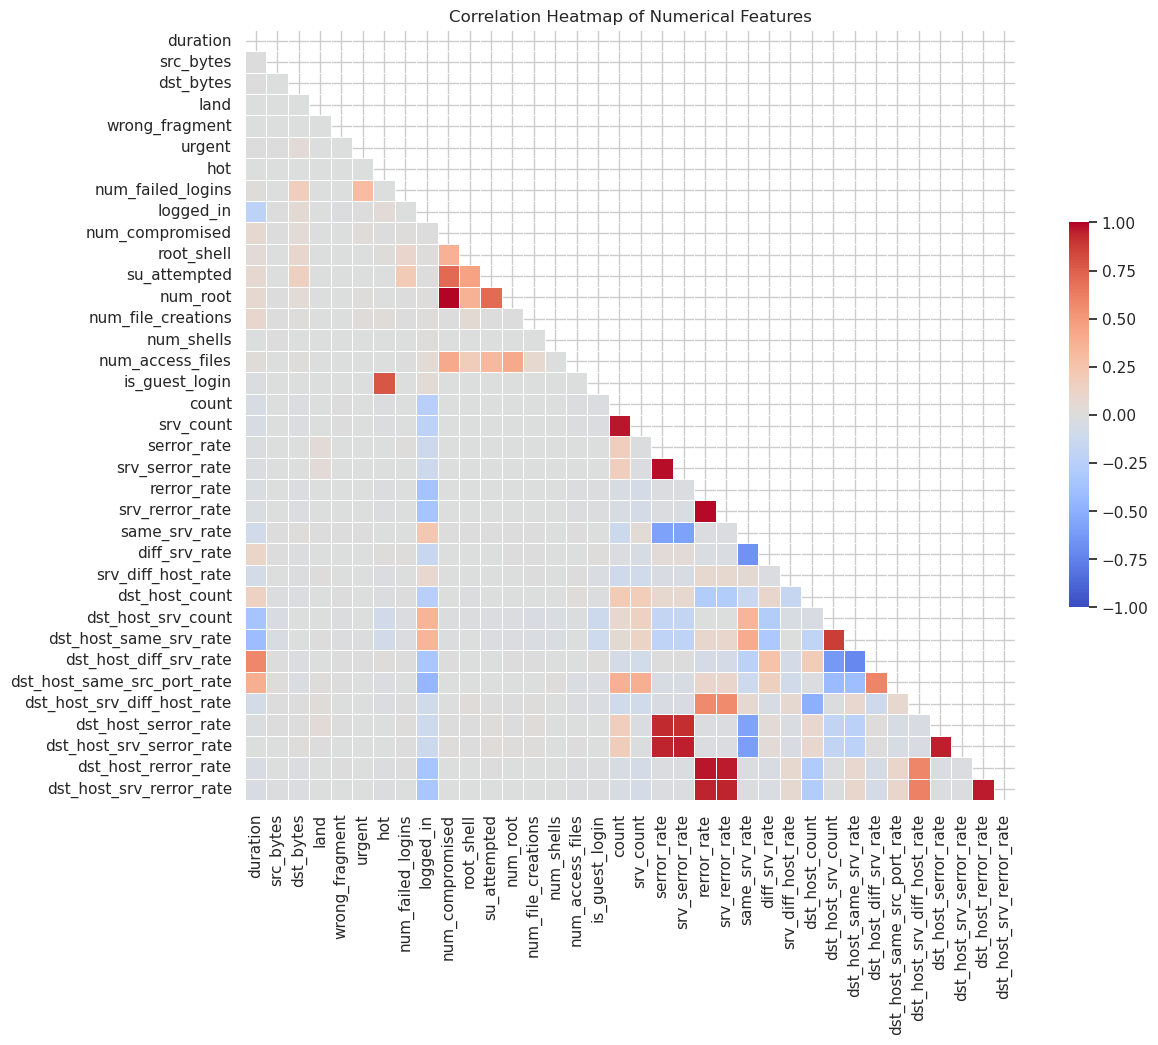

✅ EDA Completed.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Import custom modules
from trident.data import load_data
from trident.features import preprocess_data
from trident.models import train_random_forest

# Configure plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("🚀 Starting Exploratory Data Analysis (EDA)...")

# 2. Load the Raw Data
data_path = "../data/raw/network_data.csv"
try:
    df = load_data(data_path)
    print(f"✅ Data loaded. Shape: {df.shape}")
except FileNotFoundError:
    print("❌ Error: Data file not found. Run 00_Data_Setup.ipynb first.")

# 3. Basic Overview
print("\n--- Data Structure ---")
print(df.info())
display(df.head())

# 4. Target Distribution Analysis (The "Why we need SMOTE" plot)
print("\n--- Class Distribution (Label) ---")
class_counts = df['label'].value_counts()
print(class_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis')
plt.title('Distribution of Network Attacks (Class Imbalance)')
plt.xlabel('Number of Samples')
plt.ylabel('Attack Type')
plt.xscale('log') # Log scale helps visualize rare attacks
plt.show()

# 5. Protocol Analysis
print("\n--- Protocol Usage ---")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='protocol_type', palette='magma')
plt.title('Protocol Distribution')
plt.show()

# 6. Correlation Matrix (Numerical Features)
# We select only numeric columns to see relationships
print("\n--- Feature Correlations ---")
numeric_df = df.select_dtypes(include=[np.number])

# Drop columns with 0 variance (constant values)
numeric_df = numeric_df.loc[:, numeric_df.var() > 0]

if not numeric_df.empty:
    plt.figure(figsize=(14, 10))
    # Calculate correlation
    corr = numeric_df.corr()
    # Mask the upper triangle (redundant)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
else:
    print("Not enough numeric data for correlation matrix.")

print("✅ EDA Completed.")